https://machinelearningmastery.com/imbalanced-classification-model-to-detect-microcalcifications/

In [6]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

In [7]:
import pandas as pd

pd.set_option( 'display.max_columns' , None ) 

In [17]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/mammography.csv'
    
df = pd.read_csv( url , header = None )

In [18]:
df.shape

(11183, 7)

In [19]:
df.head()

,0,1,2,3,4,5,6
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,'-1'
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,'-1'
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,'-1'
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,'-1'
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,'-1'


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11183 entries, 0 to 11182
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       11183 non-null  float64
 1   1       11183 non-null  float64
 2   2       11183 non-null  float64
 3   3       11183 non-null  float64
 4   4       11183 non-null  float64
 5   5       11183 non-null  float64
 6   6       11183 non-null  object 
dtypes: float64(6), object(1)
memory usage: 611.7+ KB


In [13]:
from collections import Counter

In [14]:
target = df.values[ : , -1 ]

counter = Counter( target )

print( counter )

Counter({"'-1'": 10923, "'1'": 260})


In [15]:
for k , v in counter.items():

    p = v / len( target ) * 100

    print( f'class : {k} | count : {v} | % : {p:.2f} ' )

class : '-1' | count : 10923 | % : 97.68 
class : '1' | count : 260 | % : 2.32 


In [21]:
from matplotlib import pyplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B305550>,
      dtype=object)

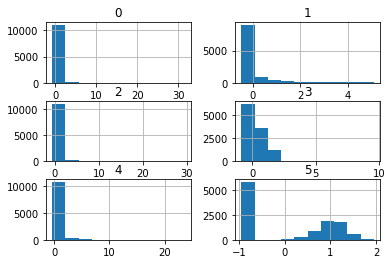

In [23]:
df.hist()

*...We can see that the variables have differing scales and that most of the variables have an exponential distribution, e.g. most cases falling into one bin, and the rest falling into a long tail. The final variable appears to have a bimodal distribution. Depending on the choice of modeling algorithms, we would expect **scaling** the distributions to the same range to be useful, and perhaps the use of some **power transforms**...*

In [26]:
from sklearn.preprocessing import LabelEncoder

In [28]:
data = df.values

X = data[ : , : -1 ]

y = data[ : , -1 ]

y = LabelEncoder().fit_transform( y )

# Baseline Result

In [31]:
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score

In [37]:
def evaluate_model( X , y , model ) :

    cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )

    scores = cross_val_score( model , X , y , scoring = 'roc_auc' , cv = cv , n_jobs = -1 )

    return scores

In [38]:
from sklearn.dummy import DummyClassifier

In [39]:
model = DummyClassifier( strategy = 'stratified' )

In [40]:
from numpy import mean

from numpy import std

In [41]:
scores = evaluate_model( X , y , model )

print( f'dummy model | accuracy : {mean(scores):.3f} ( {std(scores):.3f} )' )

dummy model | accuracy : 0.501 ( 0.018 )


# <div class="alert alert-block alert-success">Evaluate Cost-Sensitive Algorithms</div>

In [42]:
from sklearn.preprocessing import PowerTransformer

from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

In [48]:
def get_models():

    models = dict()
    
    
    steps = [ ( 'step_power_transform' , PowerTransformer() ) , 
              ( 'step_model' , LogisticRegression( solver = 'lbfgs' , class_weight = 'balanced' ) ) ]
    
    model = Pipeline( steps = steps )
    
    models[ 'LR' ] = model
    
    
    steps = [ ( 'step_power_transform' , PowerTransformer() ) , 
              ( 'step_model' , SVC( gamma = 'scale' , class_weight = 'balanced' ) ) ]
    
    model = Pipeline( steps = steps )
    
    models[ 'SVM' ] = model
    
    
    steps = [ ( 'step_power_transform' , PowerTransformer() ) , 
              ( 'step_model' , RandomForestClassifier( n_estimators = 1000 ) ) ]
    
    model = Pipeline( steps = steps )
    
    models[ 'RF' ] = model
    
    return models

In [49]:
models = get_models()

print( models )

{'LR': Pipeline(steps=[('step_power_transform', PowerTransformer()),
                ('step_model', LogisticRegression(class_weight='balanced'))]), 'SVM': Pipeline(steps=[('step_power_transform', PowerTransformer()),
                ('step_model', SVC(class_weight='balanced'))]), 'RF': Pipeline(steps=[('step_power_transform', PowerTransformer()),
                ('step_model', RandomForestClassifier(n_estimators=1000))])}


In [50]:
models = get_models()

results = list()

names = list()


for name , model in models.items() :
    
    names.append( name )
    
    scores = evaluate_model( X , y , model ) 
    
    results.append( scores )
    
    print( f' model : {name} : {mean(scores):.3f} ( {std(scores):.3f} )' )

 model : LR : 0.923 ( 0.036 )
 model : SVM : 0.958 ( 0.024 )
 model : RF : 0.952 ( 0.031 )


In [51]:
from matplotlib import pyplot

{'whiskers': [<matplotlib.lines.Line2D at 0x1e5226a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e522da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e522278>,
 'medians': [<matplotlib.lines.Line2D at 0x1e529470>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e529b00>,
 'means': [<matplotlib.lines.Line2D at 0x1e5297b8>,
  <matplotlib.lines.Line2D at 0x1e54cd68>]}

(array([1, 2, 3]), <a list of 3 Text xticklabel objects>)

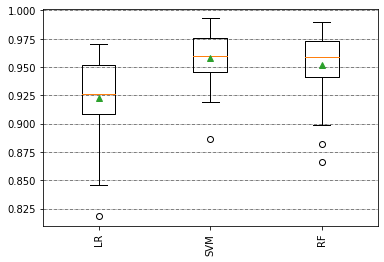

In [52]:
pyplot.boxplot( results , labels = names , showmeans = True )

pyplot.grid( axis = 'y' , color = 'black' , linestyle = '-.' , linewidth = 0.5 )

pyplot.xticks( rotation = 90 )

pyplot.show()